In [1]:
import pandas as pd
import numpy as np
import re
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as shc

In [2]:
%matplotlib inline

In [3]:
data = pd.read_excel("EBA2017_Full_Data_and_Scores.xlsx",sheetname='EBA2017',header=1)

/Applications/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [4]:
data.columns = pd.Series(data.columns).str.replace('\n',' ')

In [5]:
data.columns = data.columns.str.strip()

In [6]:
data.Region.unique()

array(['Europe & Central Asia', 'South Asia', 'Sub-Saharan Africa',
       'Latin America & Caribbean', 'East Asia & Pacific',
       'High income: OECD', 'Middle East & North Africa'], dtype=object)

In [7]:
DropColumn = ['Seed Ranking','Time to register new variety (days)',
            'Cost to register new variety (% income per capita)','Fertilizer Ranking','Time to register a new fertilizer product (days)',
            'Cost to register a new fertilizer product (% income per capita)',
            'Machinery Ranking','Time to obtain type approval (days)',
            'Cost to obtain type approval (% income per capita)',
            'Time to register a tractor (days)',
            'Cost to register a tractor (% income per capita)', 'Finance Ranking','Markets Ranking',
            'Documents to export agricultural goods (number)',
            'Time to export agricultural goods (days)',
            'Cost to export agricultural goods (% income per capita)',
            'Transport Ranking','Time to obtain trucking licenses (days)',
            'Cost to obtain trucking licenses (% income per capita)','Time to obtain cross-border licenses (days)',
            'Cost to obtain cross-border licenses (% income per capita)',
            'Water Ranking','ICT Ranking']

In [8]:
data = data.drop(DropColumn,axis=1)

In [9]:
data.columns

Index(['Country code', 'Economy', 'Region', 'Region code', 'WB Income Group',
       'Product group', 'Cropping seasons', 'Seed DTF',
       'Plant breeding index (0-10)', 'Variety registration index (0-8)',
       'Seed quality control index (0-12)', 'Fertilizer DTF',
       'Fertilizer registration index (0-7)',
       'Quality control of fertilizer index (0-7)',
       'Importing & distributing fertilizer index (0-7)', 'Machinery DTF',
       'Tractor operations index (0-5)',
       'Tractor testing and standards index (0-8)',
       'Tractor import index (0-5)', 'Finance DTF',
       'Branchless Banking - Agent banking index (0-5)',
       'Branchless Banking - E-money index (0-4)',
       'Movable Collateral - Warehouse receipts index (0-5)',
       'Movable Collateral - Doing Business - getting credit index (0-8)',
       'Non-bank Lending Institutions - Microfinance institutions index (0-7)',
       'Non-bank Lending Institutions - Financial cooperatives index (0-7)',
       'Ma

In [10]:
CountryInformation = data.ix[:,0:7]

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [11]:
DTFScore = data.loc[:, data.columns.str.contains("DTF")]

In [12]:
DTFScore.columns

Index(['Seed DTF', 'Fertilizer DTF', 'Machinery DTF', 'Finance DTF',
       'Markets DTF', 'Transport DTF', 'Water DTF', 'ICT DTF'],
      dtype='object')

In [13]:
Topic_Data = pd.concat([CountryInformation,DTFScore],axis=1)

In [14]:
Topic_Cluster_Data = Topic_Data.ix[:,7:]

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


### Seed

In [15]:
seed_data = data[['Plant breeding index (0-10)', 'Variety registration index (0-8)',
       'Seed quality control index (0-12)']]
seed_data = np.array(seed_data)

In [16]:
#Standardize
#seed_standardized_data = stats.zscore(seed_data)

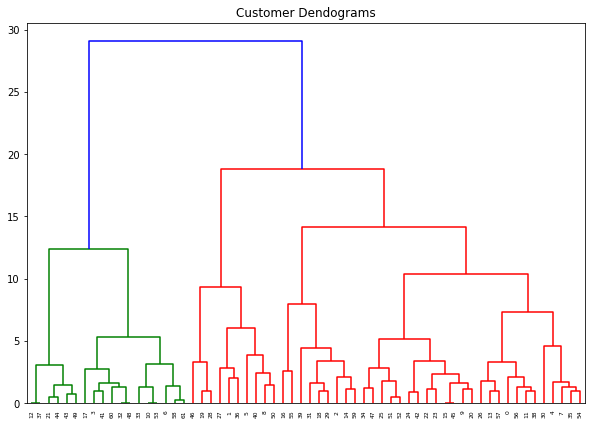

In [17]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(seed_data, method='ward'))

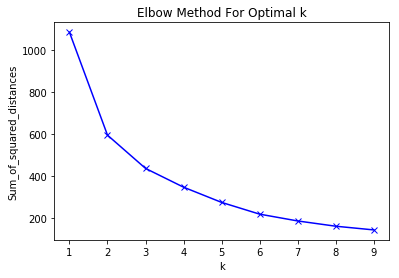

In [18]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(seed_data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3671363619443043


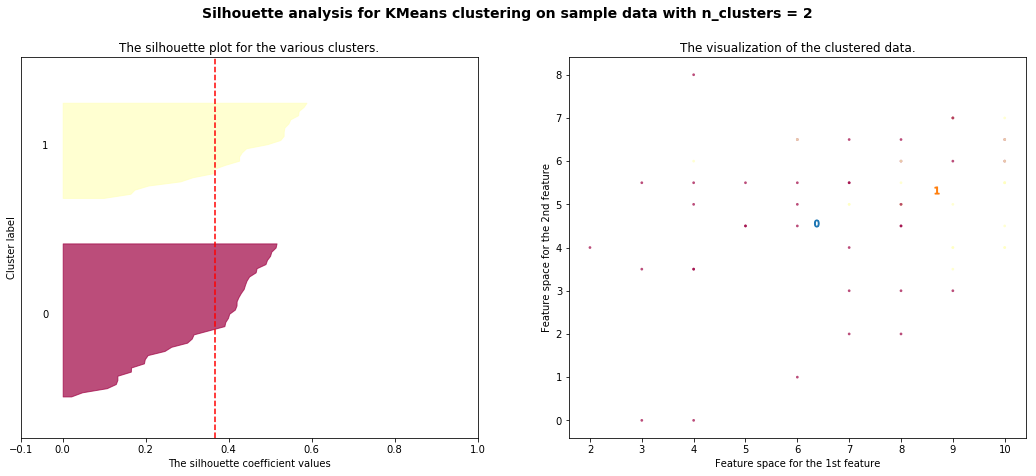

For n_clusters = 3 The average silhouette_score is : 0.29505387392444743


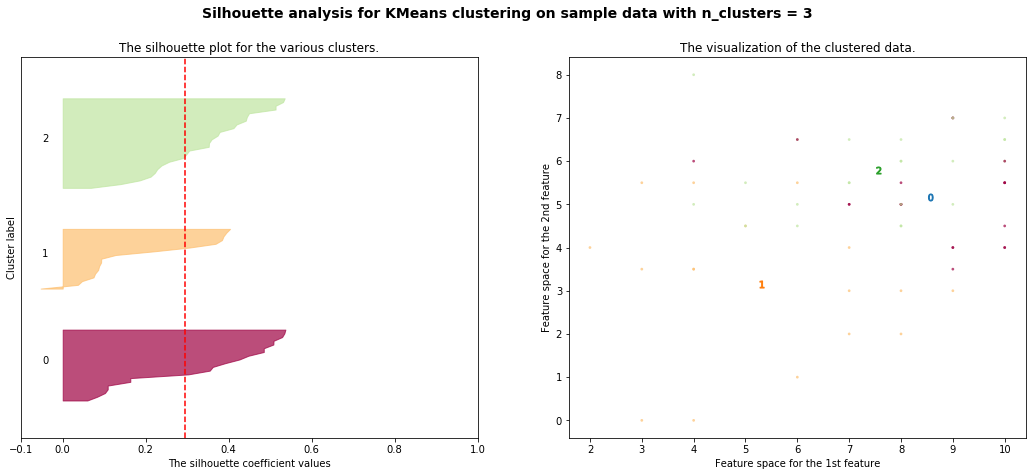

In [19]:
cluster_range = range(2,4)

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig,(ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(seed_data) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(seed_data)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(seed_data, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(seed_data, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.Spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(seed_data[:, 0], seed_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()

In [20]:
# Number of clusters
k = 2
# Number of training data
n = seed_data.shape[0]
# Number of features in the data
c = seed_data.shape[1]
kmeans = KMeans(n_clusters=k, algorithm='auto', random_state=None).fit(seed_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0.5,0,'Seed quality control index')

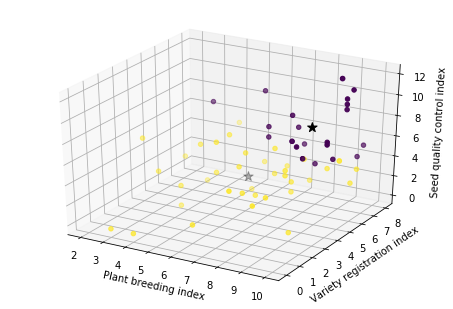

In [21]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(seed_data[:, 0], seed_data[:, 1], seed_data[:, 2],c=labels)
ax.scatter(centroids[:, 0], centroids[:, 1],centroids[:, 2], marker='*', c="black", s=100)
ax.set_xlabel('Plant breeding index')
ax.set_ylabel('Variety registration index')
ax.set_zlabel('Seed quality control index')

In [22]:
CountryInformation["Seed_labels"]=labels

### Fertilizer

In [23]:
fertilizer_data = data[[
       'Fertilizer registration index (0-7)',
       'Quality control of fertilizer index (0-7)',
       'Importing & distributing fertilizer index (0-7)']]

In [24]:
fertilizer_data = np.array(fertilizer_data)

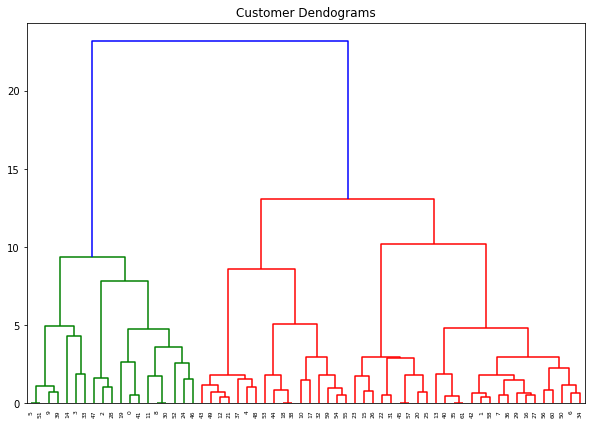

In [25]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(fertilizer_data, method='ward'))

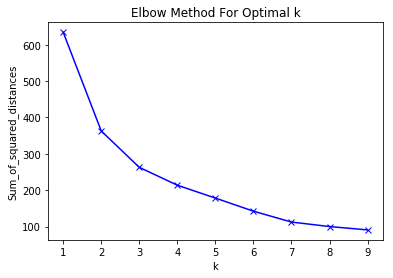

In [26]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(fertilizer_data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [27]:
# Number of clusters
k = 3
# Number of training data
n = fertilizer_data.shape[0]
# Number of features in the data
c = fertilizer_data.shape[1]
kmeans = KMeans(n_clusters=k, algorithm='auto', random_state=None).fit(fertilizer_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0.5,0,'Importing & distributing fertilizer index')

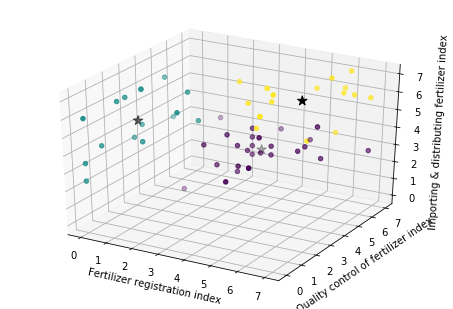

In [28]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(fertilizer_data[:, 0], fertilizer_data[:, 1], fertilizer_data[:, 2],c=labels)
ax.scatter(centroids[:, 0], centroids[:, 1],centroids[:, 2], marker='*', c="black", s=100)
ax.set_xlabel('Fertilizer registration index')
ax.set_ylabel('Quality control of fertilizer index')
ax.set_zlabel('Importing & distributing fertilizer index')

In [29]:
CountryInformation["Fertilizer_labels"]=labels

In [30]:
grouped_df = CountryInformation.groupby("Fertilizer_labels")

for key, item in grouped_df:
    print(grouped_df["Economy"].get_group(key).tolist(), "\n\n")

['Bangladesh', 'Bolivia', 'Burundi', 'Cambodia', 'Egypt, Arab Rep.', 'Ethiopia', 'Ghana', 'Greece', 'Guatemala', 'Lao PDR', 'Malawi', 'Mali', 'Mozambique', 'Myanmar', 'Nepal', 'Nicaragua', 'Nigeria', 'Philippines', 'Romania', 'Sri Lanka', 'Tanzania', 'Thailand', 'Turkey', 'Uganda', 'Uruguay', 'Vietnam', 'Zambia', 'Zimbabwe'] 


['Armenia', 'Benin', 'Burkina Faso', 'Cameroon', 'Chile', "Côte d'Ivoire", 'Haiti', 'Kenya', 'Liberia', 'Malaysia', 'Morocco', 'Niger', 'Peru', 'Rwanda', 'Senegal', 'Sudan', 'Tajikistan'] 


['Bosnia and Herzegovina', 'Colombia', 'Denmark', 'Georgia', 'India', 'Italy', 'Jordan', 'Kazakhstan', 'Korea, Rep.', 'Kyrgyz Republic', 'Mexico', 'Netherlands', 'Poland', 'Russian Federation', 'Serbia', 'Spain', 'Ukraine'] 




### Machinery

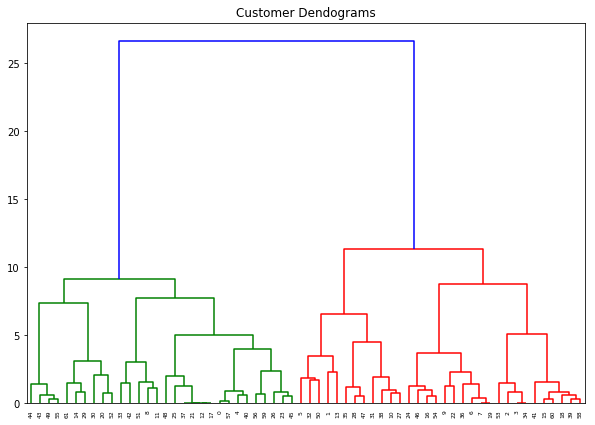

In [31]:
machinery_data = data[[
       'Tractor operations index (0-5)',
       'Tractor testing and standards index (0-8)',
       'Tractor import index (0-5)']]
machinery_data = np.array(machinery_data)
#Standardize
# machinery_standardized_data = stats.zscore(machinery_data)
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(machinery_data, method='ward'))

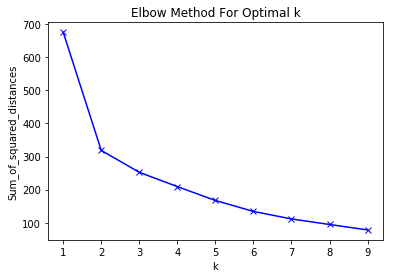

In [32]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(machinery_data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.43440809954689125


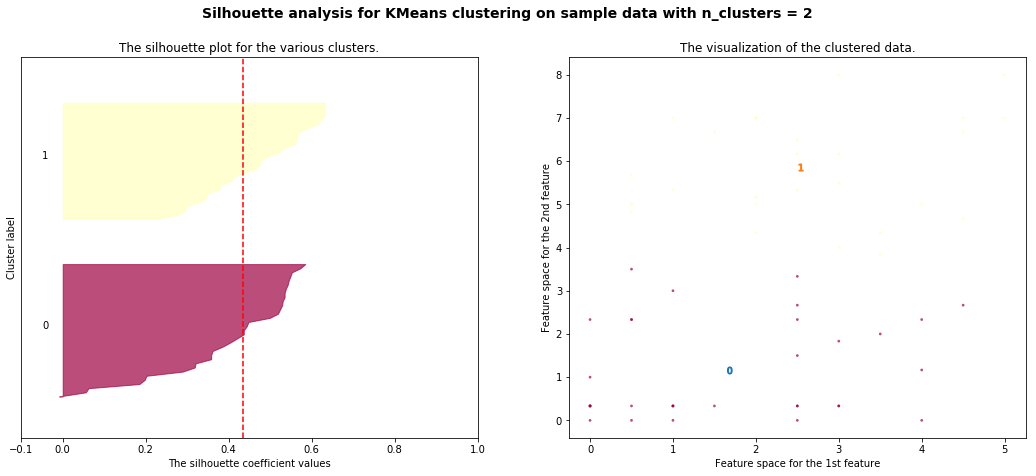

For n_clusters = 3 The average silhouette_score is : 0.3722217080864294


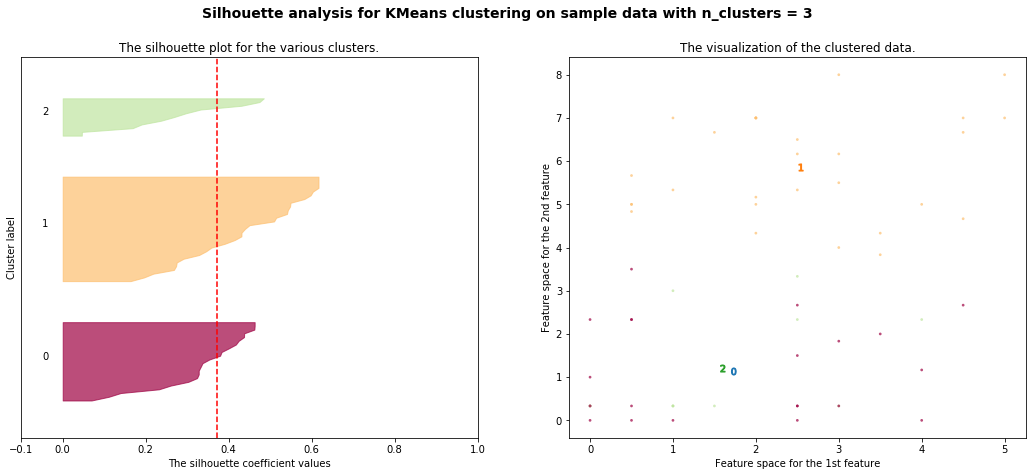

For n_clusters = 4 The average silhouette_score is : 0.38137989332309324


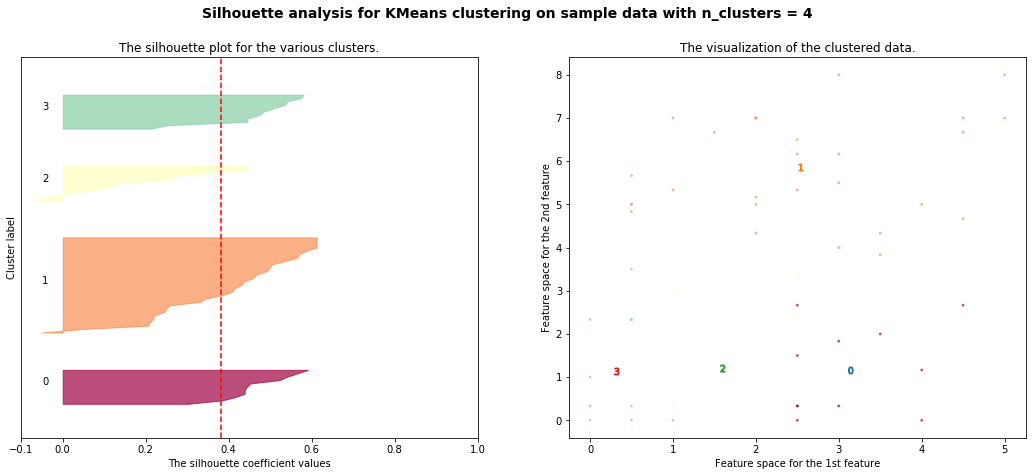

In [33]:
cluster_range = range(2,5)

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig,(ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(machinery_data) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(machinery_data)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(machinery_data, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(machinery_data, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.Spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(machinery_data[:, 0], machinery_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()

Text(0.5,0,'Tractor import index')

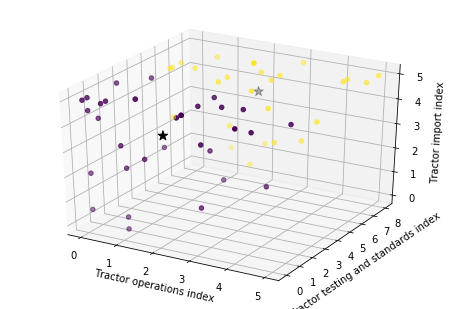

In [34]:
# Number of clusters
k = 2
# Number of training data
n = machinery_data.shape[0]
# Number of features in the data
c = machinery_data.shape[1]
kmeans = KMeans(n_clusters=k, algorithm='auto', random_state=None).fit(machinery_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(machinery_data[:, 0], machinery_data[:, 1], machinery_data[:, 2],c=labels)
ax.scatter(centroids[:, 0], centroids[:, 1],centroids[:, 2], marker='*', c="black", s=100)
ax.set_xlabel('Tractor operations index')
ax.set_ylabel('Tractor testing and standards index')
ax.set_zlabel('Tractor import index')

In [35]:
CountryInformation["Machinery_labels"]=labels

In [36]:
grouped_df = CountryInformation.groupby("Machinery_labels")

for key, item in grouped_df:
    print(grouped_df["Economy"].get_group(key).tolist(), "\n\n")

['Bangladesh', 'Benin', 'Bolivia', 'Burkina Faso', 'Burundi', 'Cambodia', 'Chile', 'Colombia', 'Egypt, Arab Rep.', 'Georgia', 'Ghana', 'Guatemala', 'Haiti', 'Jordan', 'Kenya', 'Lao PDR', 'Liberia', 'Malaysia', 'Mali', 'Mexico', 'Mozambique', 'Myanmar', 'Nepal', 'Nicaragua', 'Niger', 'Peru', 'Rwanda', 'Senegal', 'Sri Lanka', 'Tanzania', 'Thailand', 'Uruguay', 'Zambia'] 


['Armenia', 'Bosnia and Herzegovina', 'Cameroon', "Côte d'Ivoire", 'Denmark', 'Ethiopia', 'Greece', 'India', 'Italy', 'Kazakhstan', 'Korea, Rep.', 'Kyrgyz Republic', 'Malawi', 'Morocco', 'Netherlands', 'Nigeria', 'Philippines', 'Poland', 'Romania', 'Russian Federation', 'Serbia', 'Spain', 'Sudan', 'Tajikistan', 'Turkey', 'Uganda', 'Ukraine', 'Vietnam', 'Zimbabwe'] 




### Transport

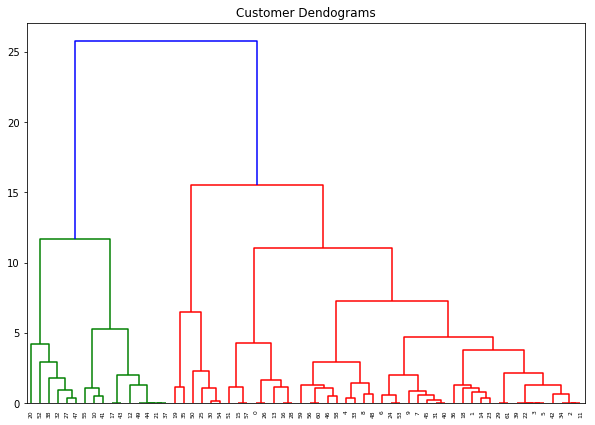

In [37]:
transport_data = data[['Trucking licenses and operations index (0-11)',
       'Cross-border transportation index (0-9)']]
transport_data = np.array(transport_data)
#Standardize
# machinery_standardized_data = stats.zscore(machinery_data)
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(transport_data, method='ward'))

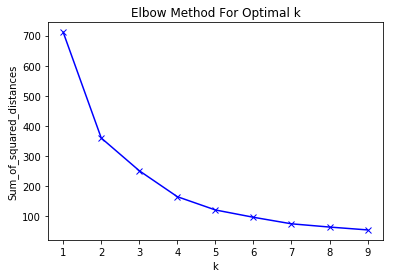

In [38]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(transport_data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.45085186007761907


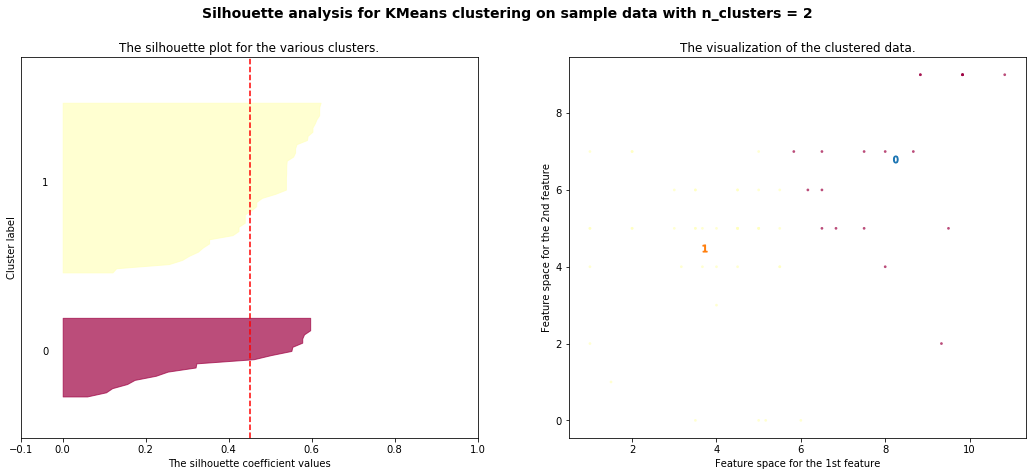

For n_clusters = 3 The average silhouette_score is : 0.4635136306982089


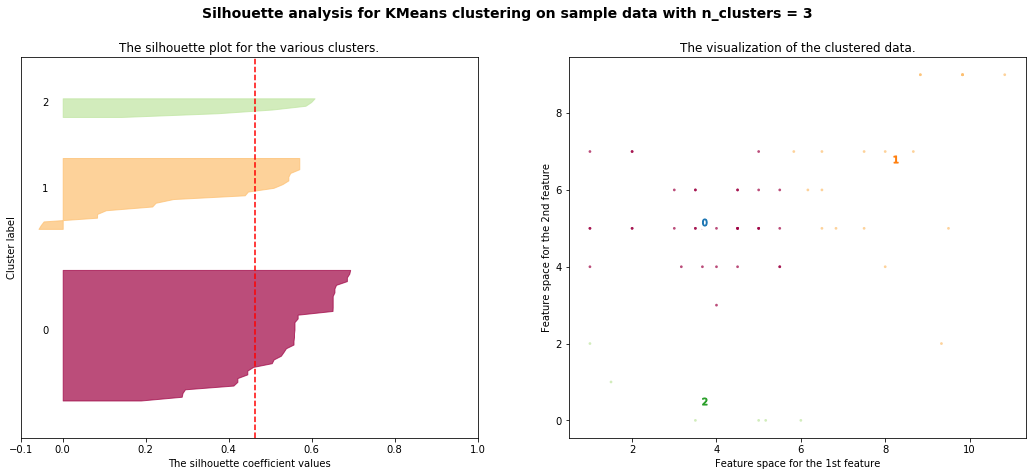

For n_clusters = 4 The average silhouette_score is : 0.3981177039347089


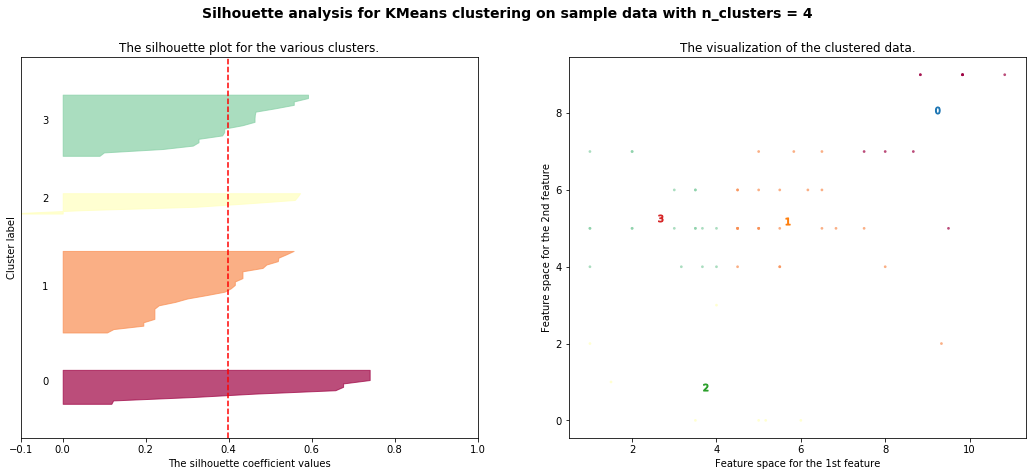

In [39]:
cluster_range = range(2,5)

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig,(ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(transport_data) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(transport_data)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(transport_data, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(transport_data, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.Spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(transport_data[:, 0], transport_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()

Text(0,0.5,'Cross-border transportation index')

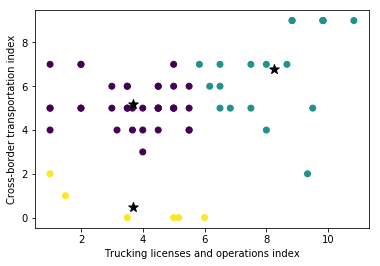

In [40]:
# Number of clusters
k = 3
# Number of training data
n = transport_data.shape[0]
# Number of features in the data
c = transport_data.shape[1]
kmeans = KMeans(n_clusters=k, algorithm='auto', random_state=None).fit(transport_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(transport_data[:, 0], transport_data[:, 1],c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c="black", s=100)
plt.xlabel("Trucking licenses and operations index")
plt.ylabel("Cross-border transportation index")

In [41]:
CountryInformation["Transport_labels"]=labels

In [42]:
grouped_df = CountryInformation.groupby("Transport_labels")

for key, item in grouped_df:
    print(grouped_df["Economy"].get_group(key).tolist(), "\n\n")

['Armenia', 'Bangladesh', 'Benin', 'Bolivia', 'Burkina Faso', 'Burundi', 'Cambodia', 'Chile', "Côte d'Ivoire", 'Egypt, Arab Rep.', 'Ethiopia', 'Georgia', 'Ghana', 'Guatemala', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Liberia', 'Malawi', 'Mali', 'Mozambique', 'Nepal', 'Niger', 'Nigeria', 'Philippines', 'Russian Federation', 'Rwanda', 'Sudan', 'Tanzania', 'Uganda', 'Ukraine', 'Uruguay', 'Vietnam', 'Zambia', 'Zimbabwe'] 


['Bosnia and Herzegovina', 'Cameroon', 'Colombia', 'Denmark', 'Greece', 'India', 'Italy', 'Lao PDR', 'Mexico', 'Morocco', 'Netherlands', 'Nicaragua', 'Peru', 'Poland', 'Romania', 'Senegal', 'Serbia', 'Spain', 'Tajikistan', 'Turkey'] 


['Haiti', 'Korea, Rep.', 'Malaysia', 'Myanmar', 'Sri Lanka', 'Thailand'] 




In [44]:
CountryInformation.to_csv('TableauKmeans.csv')